# Aula 19 &mdash; Aprendizado não-supervisionado - Agrupamento

Renato Vimieiro

rv2 {em} cin.ufpe.br

maio 2017

## Introdução

Dedicamos as últimas aulas ao estudo de modelos para aprendizado supervisionado. No caso supervisionado, o objetivo do algoritmo de aprendizado é ajustar um modelo capaz de predizer um valor para uma variável dependente a partir de um conjunto de variáveis independentes. Vimos que esse problema está relacionado tanto a variáveis contínuas (regressão) quanto variáveis categóricas (classificação). No problema de aprendizado não-supervisionado, os algoritmos não levam em consideração a variável dependente (se ela existir). 

Os algoritmos de agrupamento ou clustering são classificados como algoritmos de aprendizado não-supervisionado. O objetivo desses algoritmos é encontrar subgrupos de exemplos que concentram mais características em comum entre si do que com exemplos em outros grupos. Essa tarefa pode, por exemplo, preceder o aprendizado supervisionado. Podemos querer identificar grupos de clientes para direcionar nossa campanha de marketing e, em seguida, podemos aplicar técnicas de aprendizado supervisionado, e.g. regressão linear, para ajustar um modelo para cada segmento. No exemplo que consideramos durante as aulas de regressão linear, isso significaria verificar a efetividade (aumento de vendas) de nossa campanha para cada grupo de clientes. Dessa forma, poderíamos constatar que entre um público mais jovem campanhas majoritariamente online e TV seriam mais efetivas que em rádio e jornal impresso. Por outro lado, campanhas direcionadas a idosos seriam o inverso. No caso de classificação, poderíamos encontrar grupos de pacientes com câncer de próstata similares e depois ajustar um modelo baseado em rótulos atribuídos a esses grupos.

Os algoritmos de clustering dividem as amostras em grupos baseado em um função de (dis)similaridade/distância. A escolha da função de distância é dependente dos dados. As mais populares são: euclidiana, cosseno e correlação para dados numéricos; e manhattan e jaccard para dados categóricos. Os algoritmos podem buscar os grupos dividindo as amostras em subgrupos (o conjunto de todas é um único cluster), sendo chamados de **particionais**; ou podem reunir amostras mais comuns em um grupo (cada amostra é inicialmente um grupo), sendo chamados de **aglomerativos**. O representante mais conhecido do universo particional é o *K-means*, enquanto o aglomerativo mais conhecido é o *hierárquico*. Estudaremos ambos nessa aula.

## Distância

As distâncias mencionadas acima são formalizadas pelas fórmulas a seguir. Nesse contexto, imaginamos um conjunto de dados com $n$ amostras cada uma descrita por $p$ atributos. Seguem as distâncias:

- Euclidiana
$$
d(x,z) = ||x-z||_2 = \sqrt{\sum_j^p (x_j - z_j)^2}
$$

- Cosseno
$$
d(x,z) = 1 - \frac{x\cdot z}{||x||_2 ||z||_2} = 1-\frac{\sum x_jz_j}{\sqrt{\sum x_j^2}\sqrt{\sum z_j^2}}
$$

- Baseada na correlação de Pearson
$$
d(x,z) = 1-\frac{cov(x,z)}{\sigma_x \sigma_z} = 1-\frac{\sum (x_j-\bar{x})(z_j-\bar{z})}{\sqrt{\sum (x_j-\bar{x})^2}\sqrt{\sum (z_j-\bar{z})^2}}
$$

- Manhattan
$$
d(x,z) = ||x-z||_1 = \sum_j^p |x_j - z_j|
$$

- Jaccard
$$
d(x,z) = 1 - \frac{|x\cap z|}{|x\cup z|}
$$


## K-Means

Como discutimos anteriormente, o K-Means é um algoritmo particional. O funcionamento do algoritmo é bastante simples. Inicialmente, o algoritmo gera aleatoriamente $k$ representantes, um para cada grupo. Em seguida, o algoritmo assinala as amostras aos grupos aos quais elas são mais próximas. A distância é avaliada com base no representante do grupo. Feito isso, novos representantes são escolhidos para cada grupo e o processo se repete. 
Os representantes são gerados com base nas médias dos atributos das amostras dos grupos, daí o nome do algoritmo. 
O processo segue até que os representantes (**centroids**) não mudem, ou que a diferença entre os centroids atuais e anteriores seja mínima.

Formalmente, esse processo visa a minimizar a seguinte função objetivo

$$
SSE(C) = \sum_i^k\sum_{x_j\in C_i}||x_j - \mu_i||^2 = \sum_i^k\sum_{x_j\in C_i}\sum^p (x_{jl} - \bar{x_{il}})^2
$$

Para ilustar o processo, vamos inicialmente gerar um conjunto de dados artificial dividio em três grupos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

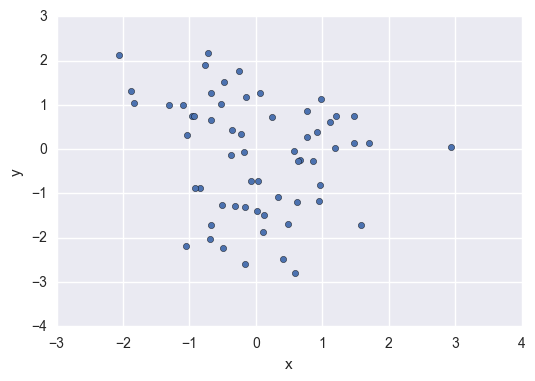

In [14]:
x1 = np.random.normal(loc=-1,scale=0.7,size=20)
x2 = np.random.normal(loc=0,scale=1.,size=20)
x3 = np.random.normal(loc=1,scale=0.5,size=20)

y1 = np.random.normal(loc=1,scale=0.5,size=20)
y2 = np.random.normal(loc=-2,scale=0.5,size=20)
y3 = np.random.normal(loc=0,scale=0.5,size=20)

df = pd.DataFrame(dict(x=np.concatenate([x1,x2,x3]),y=np.concatenate([y1,y2,y3]),c=np.repeat([1,2,3],20)))
df.plot.scatter(x='x',y='y')

In [85]:
c1 = np.random.uniform(-2,2,size=2)
c2 = np.random.uniform(-2,2,size=2)
c3 = np.random.uniform(-2,2,size=2)
c1,c2,c3

(array([-0.13682671, -0.20222997]),
 array([-1.65669336,  1.5451075 ]),
 array([ 0.81076057,  1.41638   ]))

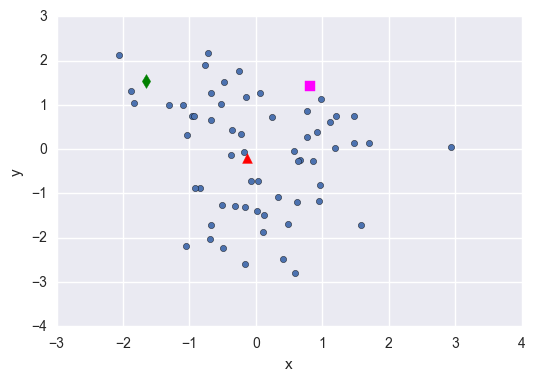

In [86]:
ax = df.plot.scatter(x='x',y='y')
ax.scatter(*c1,color='red',marker='^',s=50)
ax.scatter(*c2,marker='d',color='green',s=50)
ax.scatter(*c3,marker='s',color='magenta',s=50)

In [87]:
def dist(x):
    return pd.Series(dict(c1=np.linalg.norm(x-c1),c2=np.linalg.norm(x-c2),c3=np.linalg.norm(x-c3)))

df[['x','y']].apply(dist,axis=1)

,c1,c2,c3
0,1.273081,1.258080,1.387498
1,1.562645,1.015393,1.500119
2,1.249776,1.066079,1.891891
3,1.762626,1.171655,1.300557
4,1.495759,1.740090,0.759979
5,2.093913,0.540350,2.666412
6,1.235466,1.081134,1.859949
7,0.549764,1.870729,1.493944
8,0.666184,1.712691,1.534769
9,3.012438,0.699721,2.951997


In [88]:
clusters = df[['x','y']].apply(dist,axis=1).apply(lambda x: x.argmin(),axis=1)
clusters.head()

0    c2
1    c2
2    c2
3    c2
4    c3
dtype: object

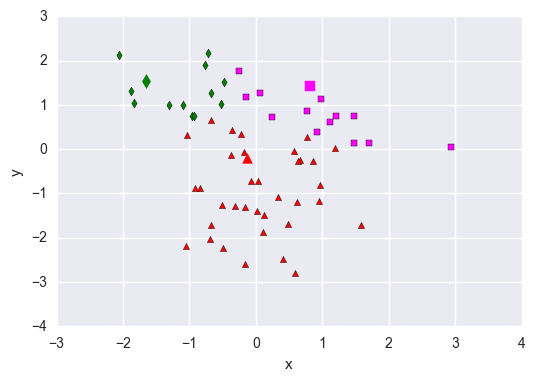

In [89]:
ax = df[clusters=='c1'].plot.scatter(x='x',y='y',marker='^',color='red')
df[clusters=='c2'].plot.scatter(x='x',y='y',marker='d', color='green',ax=ax)
df[clusters=='c3'].plot.scatter(x='x',y='y',marker='s',color='magenta', ax=ax)
ax.scatter(*c1,color='red',marker='^',s=50)
ax.scatter(*c2,marker='d',color='green',s=50)
ax.scatter(*c3,marker='s',color='magenta',s=50)

In [90]:
c = df.groupby(clusters)[['x','y']].mean()
c1 = c.loc['c1',:].values
c2 = c.loc['c2',:].values
c3 = c.loc['c3',:].values

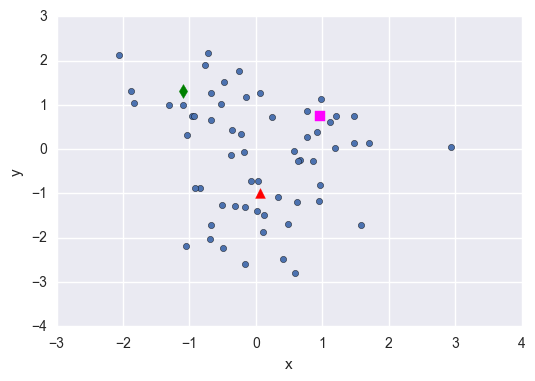

In [91]:
ax = df.plot.scatter(x='x',y='y')
ax.scatter(*c1,color='red',marker='^',s=50)
ax.scatter(*c2,marker='d',color='green',s=50)
ax.scatter(*c3,marker='s',color='magenta',s=50)

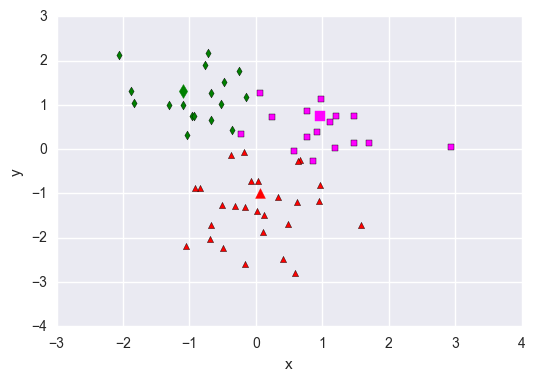

In [92]:
clusters = df[['x','y']].apply(dist,axis=1).apply(lambda x: x.argmin(),axis=1)
ax = df[clusters=='c1'].plot.scatter(x='x',y='y',marker='^',color='red')
df[clusters=='c2'].plot.scatter(x='x',y='y',marker='d', color='green',ax=ax)
df[clusters=='c3'].plot.scatter(x='x',y='y',marker='s',color='magenta', ax=ax)
ax.scatter(*c1,color='red',marker='^',s=50)
ax.scatter(*c2,marker='d',color='green',s=50)
ax.scatter(*c3,marker='s',color='magenta',s=50)

Acima foram mostradas as duas primeiras iterações do K-means sobre o conjunto de dados sintético. Repare que os centroids são deslocados para o centro de massa dos clusters. Esse deslocamento modifica os clusters, atraindo mais amostras. Isso, por sua vez, desloca novamente os centroids até se estabilizarem. Portanto, a posição inicial dos centroids tem um impacto muito grande no resultado final. Em geral, as implementações executam o algoritmo com diversos centroids iniciais e reportam o melhor resultado.

A seguir eu mostro o resultado obtido com `sklearn`.

In [94]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3).fit(df[['x','y']].values)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

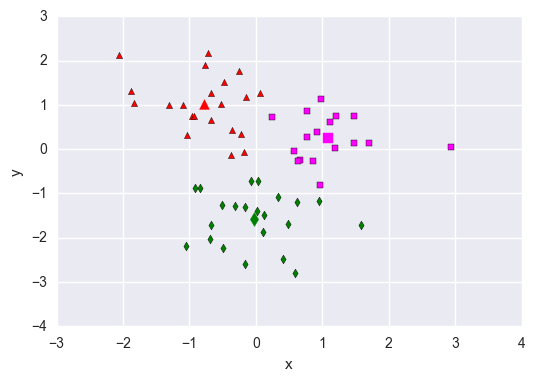

In [102]:
clusters = np.asarray(['c{}'.format(a+1) for a in model.labels_],dtype='object')
ax = df[clusters=='c1'].plot.scatter(x='x',y='y',marker='^',color='red')
df[clusters=='c2'].plot.scatter(x='x',y='y',marker='d', color='green',ax=ax)
df[clusters=='c3'].plot.scatter(x='x',y='y',marker='s',color='magenta', ax=ax)
c1, c2, c3 = model.cluster_centers_
ax.scatter(*c1,color='red',marker='^',s=50)
ax.scatter(*c2,marker='d',color='green',s=50)
ax.scatter(*c3,marker='s',color='magenta',s=50)

## Agrupamento hierárquico 

O algoritmo de clustering hierárquico, diferentemente do K-means, começa com cada amostra sendo um cluster e, a cada iteração, tenta combinar as amostras/clusters mais próximas/similares em um único cluster. O algoritmo termina quando todas as amostras são combinadas em um único cluster. 

A grande vantagem do cluster hierárquico é que essa sequência de combinações (ou fusões) podem ser reconstruídas numa árvore, chamada de dendrograma. Essa estrutura permite tanto a visualização das amostras mais próximas, como também definir o número 'ideal' de clusters.

A seguir vemos um exemplo dessa estrutura.

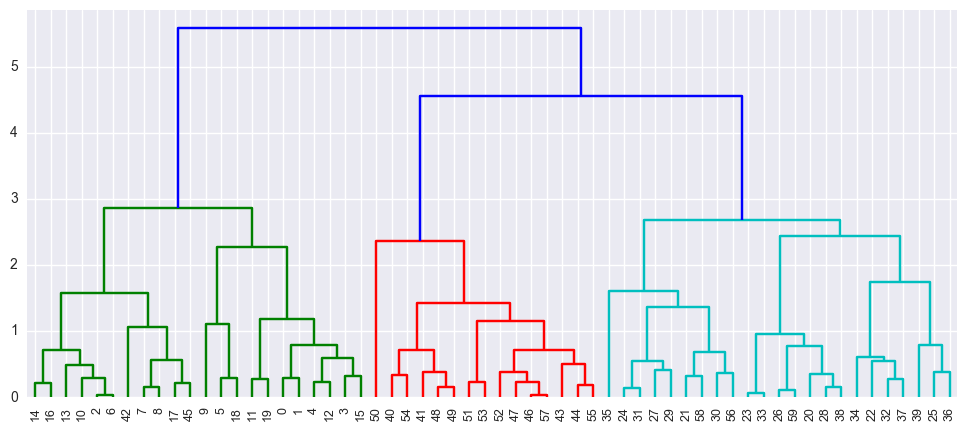

In [122]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
distancia = pdist(df[['x','y']].values)
clusters = linkage(distancia,method='complete')
plt.figure(figsize=(12,5))
dn = dendrogram(clusters,leaf_font_size=9)


Nesse ponto surgem duas perguntas: 

1. Como são computadas as distâncias entre amostras e clusters, e entre clusters?
2. O quê significa a altura em que os clusters são combinados? Ou melhor, como ler o dendrograma?

A generalização do conceito de distância (primeira pergunta) pode ser feita de diversas formas, tornando-se, assim, um parâmetro do algoritmo. As formas mais comuns são:

- **single link**: menor distância intercluster. A distância entre dois clusters A e B é a menor distância entre as amostras pertencentes a A, e as de B
- **complete link**: maior distância intercluster. É o oposto da single.
- **group average**: é a distância média entre as amostras dos dois clusters
- **centroid**: distância entre os centroids dos dois clusters (computados como no K-means)
- **Ward's method**: a distância é definida como o incremento na soma dos quadrados dos erros definido como no K-means.

Naturalmente, a escolha de diferentes critérios de distância levam a diferentes resultados. Contudo, single link tende a resultar em clusters menos balanceados. Frequentemente, os clusters são formados agregando-se uma amostra por vez. Assim, ela se torna menos interessante na prática. 

Em relação à segunda pergunta, o dendrograma é interpretado como a seguir. O diagrama é lido de baixo para cima. As linhas horizontais indicam a combinação de dois clusters. A altura dessa combinação (linha vertical) indica a distância (como computada acima) entre os dois clusters. Assim, percebemos que as amostras 2 e 6 são mais próximas entre si que as amostras 25 e 36. Embora ambos os clusters tenham sido formado no 'primeiro nível'. Outra consideração importante se faz em relação à posição das amostras em relação ao eixo x. Não podemos tirar conclusões a partir dessas posições. Por exemplo, podemos tender a interpretar que a amostra 50 é mais próxima de 40 do que de 41. Contudo, essa conclusão é errada, uma vez que a análise é feita com base nas distância entre clusters.

Podemos usar o dendrograma para particionar as amostras em grupos. Por exemplo, se podarmos a árvore na altura 3, obtemos os três clusters em verde, vermelho e azul claro. Esse corte pode ser feito como a seguir:

In [125]:
from scipy.cluster.hierarchy import cut_tree
labels = cut_tree(clusters,height=3)
labels.flatten()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1])

## Métricas de avaliação do agrupamento

Assim como no caso de aprendizado supervisionado, existem inúmeras métricas para avaliar os resultados de um agrupamento. Algumas métricas avaliam a homogeneidade dos clusters, outras avaliam o grau de concordância entre os grupos e os rótulos iniciais.

#### Adjusted Rand Index

Podemos usar o Fleiss Kappa como métrica de concordância dos rótulos. Outra alternativa é o Índice de Rand, ou sua versão ajustada. O índice de Rand é dado pela seguinte fórmula:

$$
RI = \frac{a+b}{a+b+c+d}
$$

onde $a,b,c,d$ são dados por

- $a$ é o número de pares que pertencem ao mesmo grupo nas partições S e T
- $b$ é o número de pares que pertencem a grupos distintos nas partições S e T
- $c$ é o número de pares que pertencem ao mesmo grupo em S e grupos distintos em T
- $d$ é o número de pares que pertencem ao mesmo grupo em T e grupos distintos em S

O índice de Rand ajustado é o quanto o RI difere do valor esperado. O valor do índice de Rand ajustado é dado por:

$$
ARI = \frac{\sum_{ij}\binom{|S_i\cap T_j|}{2} - [\sum\binom{|S_i|}{2}\sum\binom{|T_j|}{2}]/\binom{n}{2}}{\frac{1}{2}[\sum\binom{|S_i|}{2}+\sum\binom{|T_j|}{2}]- [\sum\binom{|S_i|}{2}\sum\binom{|T_j|}{2}]/\binom{n}{2}}
$$

Ambas as versões do índice variam entre 0 e 1, onde 0 indica nenhuma concordância e 1 completa concordância.

Computando o ARI para nosso conjunto de dados sintético, temos:


In [128]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(model.labels_,df.c)

0.85426366756290029

In [129]:
adjusted_rand_score(labels.flatten(),df.c)

0.76784277919085198

#### Silhueta

A métrica da silhueta é uma medida de homogeneidade do agrupamento. Ela avalia, em média, o quão similar uma amostra é das demais amostras de seu grupo quando comparada às amostras do cluster mais próximo. O valor da métrica para uma dada amostra é:

$$
s(x) = \frac{b(x)-a(x)}{max(b(x),a(x))}
$$

onde $b(x)$ é a menor distância média entre $x$ e as amostras de outros clusters, e $a(x)$ é a distância média de $x$  para as amostras dentro do cluster de $x$.

O valor da métrica para o cluster é a média sobre todas as amostras. Ela varia entre -1 (quando a amostra é mais distante das amostras do cluster) e 1 (quando ela é mais distante das amostras fora do cluster).


In [132]:
from sklearn.metrics import silhouette_score, silhouette_samples
print(silhouette_samples(df[['x','y']].values,model.labels_))
print(silhouette_score(df[['x','y']].values,model.labels_))

[ 0.55094839  0.59975346  0.61007481  0.53705848  0.2453906   0.57287273
  0.60913245  0.20997806  0.34122234  0.49796695  0.54534328  0.48821488
  0.38468948  0.51187653  0.63623312  0.43788456  0.62564506  0.12741325
  0.56935257  0.54101476  0.58009586  0.32095295  0.62147863  0.36196189
  0.59805905  0.49401579  0.29288657  0.53444108  0.59488347  0.62417385
  0.13512402  0.5944502   0.62453798  0.34245002  0.57054492  0.1408177
  0.55087135  0.62300985  0.59086818  0.5894282   0.42427742  0.60317254
  0.08260327  0.64610776  0.59553057  0.00945097  0.46487972  0.49871715
  0.60340607  0.62762909  0.40785854  0.61844411  0.51803303  0.65225402
  0.44623994  0.62842982  0.11854829  0.43630536  0.38335413  0.24895565]
0.474021912518


A silhueta é uma métrica muito usada também para definir o número de clusters no K-means. Podemos plotar os valores de silhueta de cada amostra por cluster e, assim, verificar visualmente a homogeneidade dos clusters obtidos. Se houverem muitos clusters com homogeneidade abaixo da média (ou essa for baixa), isso indica que devemos testar outros valores de $k$. A documentação de `sklearn` ilustra um exemplo disso http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#selecting-the-number-of-clusters-with-silhouette-analysis-on-kmeans-clustering

Finalmente, `sklearn` possui uma boa documentação sobre métricas de avaliação do agrupamento no seguinte link http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation